<a href="https://colab.research.google.com/github/daar1518/Capstone-Project/blob/main/Processed_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from operator import add
import seaborn as sns

%matplotlib inline

data = pd.read_csv('heart_2020_cleaned.csv')

# Display the first few rows of the dataset
print(data.head())

# Check the data types of each column
print(data.dtypes)

# Check for missing values
print(data.isnull().sum())

# Explore summary statistics
print(data.describe())


  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1       

In [3]:
data.drop(['Race', ],axis=1,inplace=True)
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,No,Yes,Very good,8.0,No,No,No


In [4]:
data.duplicated().sum()

24345

In [5]:
data.drop_duplicates(inplace=True)

In [6]:
data['AgeCategory']=data['AgeCategory'].replace(['18-24','25-29'],'Young')
data['AgeCategory']=data['AgeCategory'].replace(['30-34','35-39','40-44','45-49'],'Adult')
data['AgeCategory']=data['AgeCategory'].replace(['50-54','55-59','60-64','65-69'],'Old')
data['AgeCategory']=data['AgeCategory'].replace(['70-74','75-79','80 or older'],'Very Old')

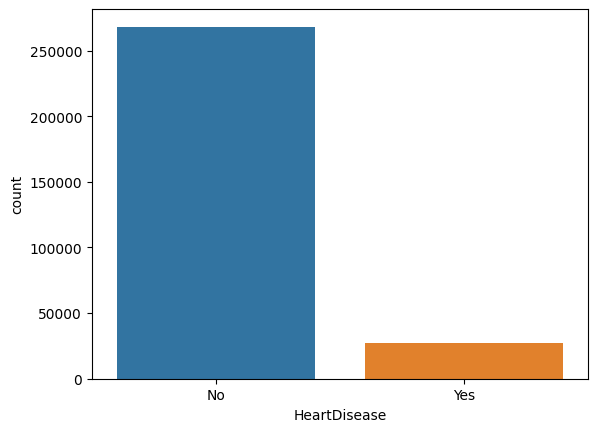

There are 268202 patients without heart disease and 27248 patients with the disease


In [7]:
sns.countplot(x='HeartDisease',data=data)
plt.show()
cases = data.HeartDisease.value_counts()
print(f"There are {cases[0]} patients without heart disease and {cases[1]} patients with the disease")

In [8]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
for col in data:
    data[col]=label.fit_transform(data[col])
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,223,1,0,0,3,30,0,0,1,2,1,4,4,1,0,1
1,0,524,0,0,1,0,0,0,0,2,0,1,4,6,0,0,0
2,0,1103,1,0,0,20,30,0,1,1,2,1,1,7,1,0,0
3,0,883,0,0,0,0,0,0,0,2,0,0,2,5,0,0,1
4,0,837,0,0,0,28,0,1,0,0,0,1,4,7,0,0,0


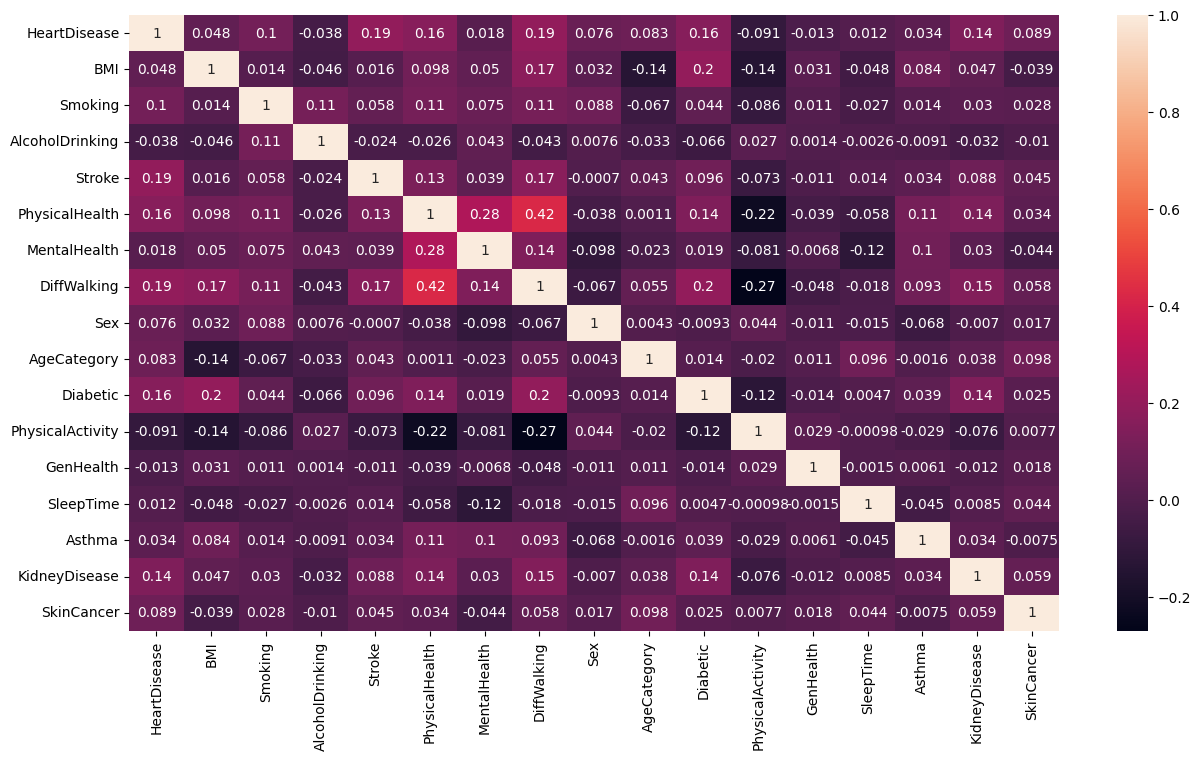

In [9]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [11]:
pip install boruta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 4.5 MB/s eta 0:00:00


In [12]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

In [13]:
#define the features
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1, class_weight='balanced')

# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2)

# find all relevant features
feat_selector.fit(X, y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	0
Rejected: 	14


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	0
Rejected: 	14


BorutaPy(estimator=RandomForestClassifier(class_weight='balanced',
                                          n_estimators=56, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x7F7B66DAAA40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F7B66DAAA40, verbose=2)

In [14]:
# show the most important features
most_important = data.columns[:-1][feat_selector.support_].tolist()
most_important

['BMI', 'AgeCategory']

In [15]:
# select the top 9 features
top_features = data.columns[:-1][feat_selector.ranking_ <9].tolist()
top_features

['BMI',
 'Smoking',
 'PhysicalHealth',
 'MentalHealth',
 'Sex',
 'AgeCategory',
 'Diabetic',
 'GenHealth',
 'SleepTime']

In [16]:
import statsmodels.api as sm

X_top = data[top_features]
y = data['HeartDisease']

res = sm.Logit(y,X_top).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.300379
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           HeartDisease   No. Observations:               295450
Model:                          Logit   Df Residuals:                   295441
Method:                           MLE   Df Model:                            8
Date:                Thu, 15 Jun 2023   Pseudo R-squ.:                 0.02365
Time:                        07:05:44   Log-Likelihood:                -88747.
converged:                       True   LL-Null:                       -90897.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
BMI               -0.0005   1.12e-05    -46.444      0.000      -0.001      -0.000
Smoking            0.3268      0.013     25.876      0.000       0.302       0.352
PhysicalHealth     0.0382      0.001     59.152      0.000       0.037       0.040
MentalHealth      -0.0235      0.001    -28.874      0.000      -0.025      -0.022
Sex                0.2486      0.013     19.728      0.000       0.224       0.273
AgeCategory        0.1366      0.007     20.601      0.000       0.124       0.150
Diabetic           0.5106      0.007     70.099      0.000       0.496       0.525
GenHealth         -0.1508      0.004    -35.328      0.000      -0.159      -0.142
SleepTime         -0.3377      0.003   -116.178      0.000      -0.343      -0.332
==================================================================================
"""

In [17]:
params = res.params
conf = res.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

                      5%       95%  Odds Ratio
BMI             0.999456  0.999500    0.999478
Smoking         1.352634  1.421284    1.386534
PhysicalHealth  1.037672  1.040306    1.038988
MentalHealth    0.975175  0.978296    0.976734
Sex             1.250984  1.314337    1.282270
AgeCategory     1.131522  1.161308    1.146318
Diabetic        1.642736  1.690320    1.666358
GenHealth       0.852850  0.867241    0.860016
SleepTime       0.709363  0.717492    0.713416


In [18]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

X = data[top_features]
y = data.iloc[:,-1]

# the numbers before smote
num_before = dict(Counter(y))

#perform smoting

# define pipeline
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_smote, y_smote = pipeline.fit_resample(X, y)


#the numbers after smote
num_after =dict(Counter(y_smote))

print(num_before, num_after)

{1: 29264, 0: 266186} {0: 266185, 1: 212948}


In [23]:
from google.colab import files
new_data = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
new_data.columns = ['BMI', 'Smoking', 'PhysicalHealth', 'MentalHealth', 'Sex', 'AgeCategory', 'Diabetic', 'GenHealth', 'SleepTime','HeartDisease']
new_data.to_csv('new_data.csv', index=False)
files.download('new_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
new_data.head()

,BMI,Smoking,PhysicalHealth,MentalHealth,Sex,AgeCategory,Diabetic,GenHealth,SleepTime,HeartDisease
0,866,1,0,10,0,2,0,2,7,0
1,631,0,3,5,1,3,0,2,6,0
2,672,1,5,5,0,1,0,2,5,0
3,442,0,30,30,0,1,0,3,4,0
4,1501,0,0,0,1,3,0,2,4,0


In [ ]:
sns.countplot(x='HeartDisease',data=new_data)
plt.show()
cases = new_data.HeartDisease.value_counts()
print(f"There are {cases[0]} patients without heart disease and {cases[1]} patients with the disease")